#  001_Off rate calculator

#### importing libraries

In [20]:
import seaborn as sns
import pandas as pd       #importa la libreria (proporciona objetos en 2D(dataframe)  
import numpy as np      #importa la libreria (proporciona objetos para matrices multidimensionales)CONSUME MENOS MEMORIA

#### *reading the data*

In [21]:
trcs = pd.read_csv("../data/trcPALMTracer-Interaction-MSD-MaxDistance3000-Filter_ROI1.txt",  sep='\t', header=[2], skiprows=0)
#Lee el archivo separa por comas (csv, como la mayoria de las bases de datos, entonces se usa mucha). Digo tb de donde empiezo a leer el archivo. sep es un delimitador,  Header dice que empiece por el segundo, skiprows es rl numero de linea a omitir.

In [22]:
ls -l

 Volume in drive C is OS

File Not Found



 Volume Serial Number is D09F-E251

 Directory of C:\Users\Saraceno\Documents\Proyecto1\notebooks



In [23]:
type (trcs)

pandas.core.frame.DataFrame

In [19]:
ls - l

 Volume in drive C is OS

File Not Found



 Volume Serial Number is D09F-E251

 Directory of C:\Users\Saraceno\Documents\Proyecto1\notebooks


 Directory of C:\Users\Saraceno\Documents\Proyecto1\notebooks



In [15]:
trcs.head(n=3) #del archivo trcs, le pido los primeros 3 valores

,Track,Plane,CentroidX(px),CentroidY(px),CentroidZ(um),Integrated_Intensity,id,Wavelength(nm),Dinst,MSD,InteractionDistance,InteractionDuration
0,2,1,30.490385,65.313110,-0.735306,68074.320312,99,685.015782,-1.880291,-2.596595,390.1806,2307
1,2,2,30.433012,65.591890,-0.730593,63461.648438,384,688.263406,-5.000000,-2.545976,345.0227,2307
2,2,3,30.436075,65.192039,0.001208,72139.218750,515,684.975512,-5.000000,-2.507172,335.0518,2307


In [16]:
help (sns) #help te da una idea de lo que hay en cada libreria

Help on package seaborn:

NAME
    seaborn - # Capture the original matplotlib rcParams

PACKAGE CONTENTS
    algorithms
    axisgrid
    categorical
    cm
    colors (package)
    conftest
    distributions
    external (package)
    matrix
    miscplot
    palettes
    rcmod
    regression
    relational
    tests (package)
    utils
    widgets

DATA
    __warningregistry__ = {'version': 19}
    crayons = {'Almond': '#EFDECD', 'Antique Brass': '#CD9575', 'Apricot':...
    xkcd_rgb = {'acid green': '#8ffe09', 'adobe': '#bd6c48', 'algae': '#54...

VERSION
    0.10.1

FILE
    c:\users\saraceno\anaconda3\lib\site-packages\seaborn\__init__.py




In [18]:
help (sns.relplot) # en este caso help nos da la info de la funcion de ploteo

Help on function relplot in module seaborn.relational:

relplot(x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='brief', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)
    Figure-level interface for drawing relational plots onto a FacetGrid.
    
    This function provides access to several different axes-level functions
    that show the relationship between two variables with semantic mappings
    of subsets. The ``kind`` parameter selects the underlying axes-level
    function to use:
    
    - :func:`scatterplot` (with ``kind="scatter"``; the default)
    - :func:`lineplot` (with ``kind="line"``)
    
    Extra keyword arguments are passed to the underlying function, so you
    should refer to the documentation for each to see kind-specific options.

#### take a firs scatter plot with seaborn

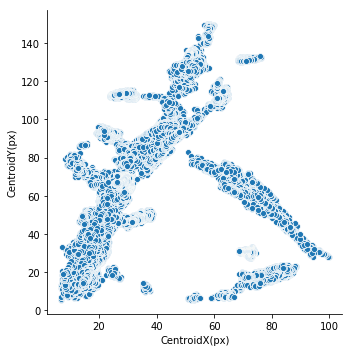

In [16]:
sns.relplot(x="CentroidX(px)", y="CentroidY(px)", data=trcs);

#### Code to review and organize ...

In [ ]:
trackHeaderName = 'Index'
trcs[trackHeaderName] = trcs['Track']
InteractionDistanceHeaderName = "InteractionDistance"
InteractionDurationHeaderName = "InteractionDuration"
trackHeaderName ='Index'                                             #setea los nombres de cada variable o columna.

planeDuration = 0.05 #@param {type:"number"}
xyPixelSize = 0.160 #@param {type:"number"}
graphUnitSize = 600 #@param {type:"slider", min:50, max:1000, step:25}       #Setea los parametros de acquisicion y tamaño de cada grafico

trcs['time'] = trcs['Plane']*planeDuration
trcs['x'] = trcs['CentroidX(px)']*xyPixelSize
trcs['y'] = trcs['CentroidY(px)']*xyPixelSize
trcs['z'] = trcs['CentroidZ(px)']*xyPixelSize #Esto lo agregue yo para tener al eje Z en nm
trcs['Wavelength'] = trcs['Wavelength(nm)']  #Multiplico cada variable de track por los paramertros.

threshold_dimer =  90#@param {type:"number"}
threshold_coconfined=3000#@param {type:"number"}
threshold_free = 3000
confinementLevels = {1:'Dimer', 2:'Co-Confined', 3:'Free'}                   #Seteo threshold de interacion para un Hiden-Markov Model

trcs['ConfinementLevel'] = np.where(trcs[InteractionDistanceHeaderName]<threshold_dimer, 1,2)
trcs['ConfinementLevel'] = np.where(trcs[InteractionDistanceHeaderName]<threshold_coconfined,trcs['ConfinementLevel'], 3)
trcs['ConfinementLevel'] = np.where(trcs[InteractionDistanceHeaderName]<threshold_free,trcs['ConfinementLevel'], 3)
#np.where nos devuelve elementos de x o y dependiendo de una condicion, en este caso nos devuelve los valores de cada estado de confinamiento.
#la condicion en este caso es la distancia (threshold) seteado y comparado con la columna interaciondistance

trackNums = pd.unique(trcs['Index']) #pd.unique nos devuelve valores unicos de una serie de datos
print(str(len(trackNums)) + " Tracks") # print es para imprimir el len() nos devuelve la longitud de una determinada string, en este caso trackNums

#@title Hit play to calculate

print('Analyzing tracks...') #muestra ese texto mientras esta analizando

theseLocs = pd.DataFrame(columns=trcs.columns) #aca creamos los 
theseConfinedLocs = pd.DataFrame(columns=trcs.columns)
interactions = pd.DataFrame()

allLocs = pd.DataFrame(columns=trcs.columns)
allConfinedLocs = pd.DataFrame(columns=trcs.columns)

trackAverageWavelengths = {}
interactionDeltaWavelengths = {}
trackLengths = {}

trackOffRateColumns =["Track", "TrackLength","AvgWavelength","PlanesInConfinement1", "PlanesInConfinement2", "PlanesInConfinement3", "Transitions_0to1", "Transitions_0to2", "Transitions_1to0", "Transitions_1to2", "Transitions_2to1", "Transitions_2to0","OffRate"]
trackOffRates = pd.DataFrame(columns = trackOffRateColumns)
allInteractions = pd.DataFrame(columns = ["Plane","Track1", "Track2", "Track1_LocID","Track2_LocID", "Track1_Wavelength","Track2_Wavelength","InteractionDistance","ConfinementLevel"])

minWavelengthVal = -1
maxWavelengthVal = 1000 # >1000 wavelength will be multiple matched, unmatched or rejected. For now, bin them all together, as they represent values of wavelength that don't actively contribute to the wavelength assignment
def filterWavelengths(col):
    _col = col
    if _col > maxWavelengthVal:
        _col = minWavelengthVal
    return _col

def trackAverageWavelength(_locs):
    locsWithWavelength = _locs[(_locs[('Wavelength')]>minWavelengthVal)]
    avgWavelength = locsWithWavelength['Wavelength'].mean()

    if math.isnan(avgWavelength):
        avgWavelength = -1

    return round(avgWavelength)
  
def trackLength(_locs):
  return len(_locs)

def locsInTrack(trackNum):
    return trcs[(trcs['Index']==trackNum)]


#Save filtered wavelength values in a new column
trcs['Wavelength'] = round(trcs['Wavelength(nm)'].apply(filterWavelengths))

#Do some rough calculations for each track before 
for trackNum in trackNums:
  theseLocs = locsInTrack(trackNum)

  trackAvgWavelength = trackAverageWavelength(theseLocs)
  trackAverageWavelengths[trackNum] = trackAvgWavelength
  trackLengths[trackNum] = trackLength(theseLocs)

print('Pre-analysis complete. Track lengths and average wavelengths calculated.')
print('')


for trackNum in trackNums:
  theseLocs = locsInTrack(trackNum)

  trackAvgWavelength = trackAverageWavelengths.get(trackNum)

  theseLocs['Wavelength'] = theseLocs['Wavelength(nm)'].apply(filterWavelengths)
  theseLocs['AverageWavelength'] = trackAvgWavelength
  theseLocs['TrackLength'] = trackLengths.get(trackNum)
  theseLocs['DeltaConfinement'] = theseLocs['ConfinementLevel'].diff()
  theseLocs['Entered0From1'] = (theseLocs['ConfinementLevel']==1) & (theseLocs['DeltaConfinement']==-1)
  theseLocs['Entered1From0'] = (theseLocs['ConfinementLevel']==2) & (theseLocs['DeltaConfinement']==1)
  theseLocs['Entered2From1'] = (theseLocs['ConfinementLevel']==3) & (theseLocs['DeltaConfinement']==1)
  theseLocs['Entered1From2'] = (theseLocs['ConfinementLevel']==2) & (theseLocs['DeltaConfinement']==-1)
  theseLocs['Entered2From0'] = (theseLocs['ConfinementLevel']==3) & (theseLocs['DeltaConfinement']==2)
  theseLocs['Entered0From2'] = (theseLocs['ConfinementLevel']==1) & (theseLocs['DeltaConfinement']==-2)

  theseConfinedLocs = pd.DataFrame(columns=trcs.columns)
  #theseConfinedLocs = confinedLocs[(confinedLocs['Index']==trackNum)]
  theseConfinedLocs = theseLocs[(theseLocs['ConfinementLevel']<3.0) & theseLocs['InteractionDistance']>0]


  if theseConfinedLocs.shape[0] > 0:

    percentConfined = round(len(theseConfinedLocs)/len(theseLocs)*100)
    print('Track# ' + str(trackNum) + '\t'  + str(percentConfined) +'% Confined \tLength: ' + str(len(theseLocs)) + '\t#ConfinedLocs: ' + str(len(theseConfinedLocs)) + '\tAverageWavelength: ' + str(trackAvgWavelength))
    
    offTransitions = sum(theseLocs['Entered1From0'])+sum(theseLocs['Entered2From0'])
    print('\t ' + '\t'  + str(sum(theseLocs['Entered1From0'])) +' 0->1 transitions')
    print('\t ' + '\t'  + str(sum(theseLocs['Entered2From0'])) +' 0->2 transitions')
    print('\t ' + '\t'  + str(offTransitions) +' OFF transitions')
    print('\t ' + '\t'  + str(offTransitions/len(theseLocs)) + ' OFF transitions per plane')
    print('\t ' + '\t'  + str(offTransitions/len(theseLocs)/planeDuration) + ' OFF transitions per second')
    #trackOffRates.append({['Track':trackNum, 'OffRate':offTransitions/len(theseLocs)/planeDuration]})
    #trackOffRates.append(pd.DataFrame([trackNum, offTransitions/len(theseLocs)/planeDuration], columns=trackOffRateColumns))
    trackOffRates = trackOffRates.append({'Track':round(trackNum),"TrackLength":len(theseLocs),"AvgWavelength":trackAvgWavelength,"PlanesInConfinement1":sum(theseLocs['ConfinementLevel']==1), "PlanesInConfinement2":sum(theseLocs['ConfinementLevel']==2), "PlanesInConfinement3":sum(theseLocs['ConfinementLevel']==3), "Transitions_0to1":sum(theseLocs['Entered1From0']==True), "Transitions_0to2":sum(theseLocs['Entered2From0']==True), "Transitions_1to0":sum(theseLocs['Entered0From1']==True), "Transitions_1to2":sum(theseLocs['Entered2From1']==True), "Transitions_2to1":sum(theseLocs['Entered1From2']==True), "Transitions_2to0":sum(theseLocs['Entered0From2']==True),'OffRate':offTransitions/len(theseLocs)/planeDuration}, ignore_index = True)
    
    theseLocs['TrackOffRate'] = offTransitions/len(theseLocs)/planeDuration
    
    
    #Find the other track(s) that interact with this one in the confined zone
    partnerTracks = []
    partnerPlanes = []
    partnerWavelengths = []
    partnerDeltaWavelengths = []
    partnerIDs = []
    partnerCentroidXs = []
    partnerCentroidYs = []
    partnerCentroidZs = []

    for index, confinedLoc in theseConfinedLocs.iterrows():
        
        thisInteractionDistance = confinedLoc['InteractionDistance']
        
        #find partner localizations in the same plane with the same interaction distance
        partnerLocs = trcs[(trcs['InteractionDistance']==thisInteractionDistance) & (trcs['Plane']==confinedLoc['Plane'])]
        
        for index2, partnerLoc in partnerLocs.iterrows():
            if partnerLoc['Index'] != trackNum:
                partnerTracks.append(partnerLoc['Index'])
                partnerPlanes.append(partnerLoc['Plane'])
                partnerIDs.append(partnerLoc['id'])
                partnerCentroidXs.append(partnerLoc['CentroidX(px)'])
                partnerCentroidYs.append(partnerLoc['CentroidY(px)'])
                partnerCentroidZs.append(partnerLoc['CentroidZ(um)'])
                partnerWavelengths.append(partnerLoc['Wavelength'])
                partnerDeltaWavelengths.append(abs(confinedLoc['Wavelength']- partnerLoc['Wavelength']))

                interactionDF = pd.DataFrame([[partnerLoc['Plane'], trackNum, partnerLoc['Index'], confinedLoc['id'], partnerLoc['id'], confinedLoc['Wavelength'], partnerLoc['Wavelength'], thisInteractionDistance, confinedLoc['ConfinementLevel']]], columns = ["Plane","Track1", "Track2","Track1_LocID","Track2_LocID", "Track1_Wavelength","Track2_Wavelength","InteractionDistance","ConfinementLevel"])
                
                if not allInteractions.empty:
                    oppositeInteractionPair = allInteractions[(allInteractions['Plane'] == partnerLoc['Plane']) & (allInteractions['Track1'] == partnerLoc['Index']) & (allInteractions['Track2'] == trackNum)]
                    if oppositeInteractionPair.empty:
                        allInteractions = allInteractions.append(interactionDF,ignore_index=True)
                else:
                    allInteractions = interactionDF.copy()
                
                thisinteractionDF = pd.DataFrame([[partnerLoc['Plane'], confinedLoc, partnerLoc]], columns=['Plane','ConfinedLoc','PartnerLoc'])
                if not interactions.empty:
                    if oppositeInteractionPair.empty:
                        interactions = interactions.append(oppositeInteractionPair,ignore_index=True)
                else:
                    interactions = thisinteractionDF.copy()
                    

    allInteractions['Track1_AvgWavelength'] = allInteractions['Track1'].map(lambda s: trackAverageWavelengths.get(s) if s in trackAverageWavelengths else s)
    allInteractions['Track2_AvgWavelength'] = allInteractions['Track2'].map(lambda s: trackAverageWavelengths.get(s) if s in trackAverageWavelengths else s)
    allInteractions['Delta_AvgWavelength'] = abs(allInteractions['Track1_AvgWavelength'] - allInteractions['Track2_AvgWavelength'])
    allInteractions['Track1_Length'] = allInteractions['Track1'].map(lambda s: trackLengths.get(s) if s in trackLengths else s)
    allInteractions['Track2_Length'] = allInteractions['Track2'].map(lambda s: trackLengths.get(s) if s in trackLengths else s)
    
   
    deltaAvgWavelength = pd.unique(partnerDeltaWavelengths)
    deltaAvgWavelengthStr = ", ".join(map(str, deltaAvgWavelength))
   

    theseLocs['PartnerTrackInPlane'] = theseLocs['Plane'].map(lambda s: partnerTracks[partnerPlanes.index(s)] if s in partnerPlanes else -1)
    theseLocs['ParnterTrackInPlaneLength'] = theseLocs['PartnerTrackInPlane'].map(lambda s: trackLengths.get(s) if s in trackLengths else -1)
    theseLocs['PartnerTrackWavelength'] = theseLocs['Plane'].map(lambda s: partnerWavelengths[partnerPlanes.index(s)] if s in partnerPlanes else -1)
    theseLocs['PartnerTrackDeltaWavelength'] = theseLocs['Plane'].map(lambda s: partnerDeltaWavelengths[partnerPlanes.index(s)] if s in partnerPlanes else -1)
    theseLocs['PartnerTrackDeltaWavelength']= theseLocs.apply(lambda x: -1 if (x.PartnerTrackWavelength == -1 or x.Wavelength==-1) else x.PartnerTrackDeltaWavelength, axis=1)
    theseLocs['PartnerTrackAverageWavelength'] = theseLocs['PartnerTrackInPlane'].map(lambda s: trackAverageWavelengths.get(s) if s in trackAverageWavelengths else s)
    theseLocs['PartnerTrackDeltaAverageWavelength'] = theseLocs.apply(lambda x: abs(x.AverageWavelength - x.PartnerTrackAverageWavelength) if (x.AverageWavelength > 0 and x.PartnerTrackAverageWavelength>0) else -1, axis=1)

    theseLocs['PartnerIDInPlane'] = theseLocs['Plane'].map(lambda s: partnerIDs[partnerPlanes.index(s)] if s in partnerPlanes else -1)
    theseLocs['PartnerCentroidX(px)'] = theseLocs['Plane'].map(lambda s: partnerCentroidXs[partnerPlanes.index(s)] if s in partnerPlanes else -1)
    theseLocs['PartnerCentroidY(px)'] = theseLocs['Plane'].map(lambda s: partnerCentroidYs[partnerPlanes.index(s)] if s in partnerPlanes else -1)
    theseLocs['PartnerCentroidZ(um)'] = theseLocs['Plane'].map(lambda s: partnerCentroidZs[partnerPlanes.index(s)] if s in partnerPlanes else -1)

    
    #print('\t ' + '\tPartner Track In Plane:'  + str(partnerTracksStr) + ' with delta wavelength ' + str(theseLocs['PartnerTrackDeltaWavelength']))

    partnerTracks = pd.unique(partnerTracks).astype('int')
    partnerTracksStr = ", ".join(map(str, partnerTracks))
    theseLocs['PartnerTracks'] = partnerTracksStr

    # partnerPlanes = pd.unique(partnerPlanes).astype('int')
    # partnerPlanesStr = ", ".join(map(str, partnerPlanes))
    # theseLocs['PlanesWithPartner'] = partnerPlanesStr
    # print('\t ' + '\tPartner Tracks:'  + str(partnerTracksStr) + '')
    # print('\t ' + '\tPlanes with Partner:'  + str(partnerPlanesStr) + '')


    # partnerIDs = pd.unique(partnerIDs).astype('int')
    # partnerIDsStr = ", ".join(map(str, partnerIDs))
    # theseLocs['PartnerIDs'] = partnerIDsStr

    theseConfinedLocs['PartnerTracks'] = partnerTracksStr
    #theseConfinedLocs['PlanesWithPartner'] = partnerPlanesStr
    theseConfinedLocs['Delta_AvgWavelength'] = deltaAvgWavelengthStr

    if not allConfinedLocs.empty:
      allConfinedLocs = allConfinedLocs.append(theseConfinedLocs,ignore_index=True)
    else:
      allConfinedLocs = theseConfinedLocs.copy()

    if not allLocs.empty:
      allLocs = allLocs.append(theseLocs,ignore_index=True)
    else:
      allLocs = theseLocs.copy()


print('Finished ')

#@title Hit play to calculate

print('Analyzing tracks...')

theseLocs = pd.DataFrame(columns=trcs.columns)
theseConfinedLocs = pd.DataFrame(columns=trcs.columns)
interactions = pd.DataFrame()

allLocs = pd.DataFrame(columns=trcs.columns)
allConfinedLocs = pd.DataFrame(columns=trcs.columns)

trackAverageWavelengths = {}
interactionDeltaWavelengths = {}
trackLengths = {}

trackOffRateColumns =["Track", "TrackLength","AvgWavelength","PlanesInConfinement1", "PlanesInConfinement2", "PlanesInConfinement3", "Transitions_0to1", "Transitions_0to2", "Transitions_1to0", "Transitions_1to2", "Transitions_2to1", "Transitions_2to0","OffRate"]
trackOffRates = pd.DataFrame(columns = trackOffRateColumns)
allInteractions = pd.DataFrame(columns = ["Plane","Track1", "Track2", "Track1_LocID","Track2_LocID", "Track1_Wavelength","Track2_Wavelength","InteractionDistance","ConfinementLevel"])

minWavelengthVal = -1
maxWavelengthVal = 1000 # >1000 wavelength will be multiple matched, unmatched or rejected. For now, bin them all together, as they represent values of wavelength that don't actively contribute to the wavelength assignment
def filterWavelengths(col):
    _col = col
    if _col > maxWavelengthVal:
        _col = minWavelengthVal
    return _col

def trackAverageWavelength(_locs):
    locsWithWavelength = _locs[(_locs[('Wavelength')]>minWavelengthVal)]
    avgWavelength = locsWithWavelength['Wavelength'].mean()

    if math.isnan(avgWavelength):
        avgWavelength = -1

    return round(avgWavelength)
  
def trackLength(_locs):
  return len(_locs)

def locsInTrack(trackNum):
    return trcs[(trcs['Index']==trackNum)]


#Save filtered wavelength values in a new column
trcs['Wavelength'] = round(trcs['Wavelength(nm)'].apply(filterWavelengths))

#Do some rough calculations for each track before 
for trackNum in trackNums:
  theseLocs = locsInTrack(trackNum)

  trackAvgWavelength = trackAverageWavelength(theseLocs)
  trackAverageWavelengths[trackNum] = trackAvgWavelength
  trackLengths[trackNum] = trackLength(theseLocs)

print('Pre-analysis complete. Track lengths and average wavelengths calculated.')
print('')


for trackNum in trackNums:
  theseLocs = locsInTrack(trackNum)

  trackAvgWavelength = trackAverageWavelengths.get(trackNum)

  theseLocs['Wavelength'] = theseLocs['Wavelength(nm)'].apply(filterWavelengths)
  theseLocs['AverageWavelength'] = trackAvgWavelength
  theseLocs['TrackLength'] = trackLengths.get(trackNum)
  theseLocs['DeltaConfinement'] = theseLocs['ConfinementLevel'].diff()
  theseLocs['Entered0From1'] = (theseLocs['ConfinementLevel']==1) & (theseLocs['DeltaConfinement']==-1)
  theseLocs['Entered1From0'] = (theseLocs['ConfinementLevel']==2) & (theseLocs['DeltaConfinement']==1)
  theseLocs['Entered2From1'] = (theseLocs['ConfinementLevel']==3) & (theseLocs['DeltaConfinement']==1)
  theseLocs['Entered1From2'] = (theseLocs['ConfinementLevel']==2) & (theseLocs['DeltaConfinement']==-1)
  theseLocs['Entered2From0'] = (theseLocs['ConfinementLevel']==3) & (theseLocs['DeltaConfinement']==2)
  theseLocs['Entered0From2'] = (theseLocs['ConfinementLevel']==1) & (theseLocs['DeltaConfinement']==-2)

  theseConfinedLocs = pd.DataFrame(columns=trcs.columns)
  #theseConfinedLocs = confinedLocs[(confinedLocs['Index']==trackNum)]
  theseConfinedLocs = theseLocs[(theseLocs['ConfinementLevel']<3.0) & theseLocs['InteractionDistance']>0]


  if theseConfinedLocs.shape[0] > 0:

    percentConfined = round(len(theseConfinedLocs)/len(theseLocs)*100)
    print('Track# ' + str(trackNum) + '\t'  + str(percentConfined) +'% Confined \tLength: ' + str(len(theseLocs)) + '\t#ConfinedLocs: ' + str(len(theseConfinedLocs)) + '\tAverageWavelength: ' + str(trackAvgWavelength))
    
    offTransitions = sum(theseLocs['Entered1From0'])+sum(theseLocs['Entered2From0'])
    print('\t ' + '\t'  + str(sum(theseLocs['Entered1From0'])) +' 0->1 transitions')
    print('\t ' + '\t'  + str(sum(theseLocs['Entered2From0'])) +' 0->2 transitions')
    print('\t ' + '\t'  + str(offTransitions) +' OFF transitions')
    print('\t ' + '\t'  + str(offTransitions/len(theseLocs)) + ' OFF transitions per plane')
    print('\t ' + '\t'  + str(offTransitions/len(theseLocs)/planeDuration) + ' OFF transitions per second')
    #trackOffRates.append({['Track':trackNum, 'OffRate':offTransitions/len(theseLocs)/planeDuration]})
    #trackOffRates.append(pd.DataFrame([trackNum, offTransitions/len(theseLocs)/planeDuration], columns=trackOffRateColumns))
    trackOffRates = trackOffRates.append({'Track':round(trackNum),"TrackLength":len(theseLocs),"AvgWavelength":trackAvgWavelength,"PlanesInConfinement1":sum(theseLocs['ConfinementLevel']==1), "PlanesInConfinement2":sum(theseLocs['ConfinementLevel']==2), "PlanesInConfinement3":sum(theseLocs['ConfinementLevel']==3), "Transitions_0to1":sum(theseLocs['Entered1From0']==True), "Transitions_0to2":sum(theseLocs['Entered2From0']==True), "Transitions_1to0":sum(theseLocs['Entered0From1']==True), "Transitions_1to2":sum(theseLocs['Entered2From1']==True), "Transitions_2to1":sum(theseLocs['Entered1From2']==True), "Transitions_2to0":sum(theseLocs['Entered0From2']==True),'OffRate':offTransitions/len(theseLocs)/planeDuration}, ignore_index = True)
    
    theseLocs['TrackOffRate'] = offTransitions/len(theseLocs)/planeDuration
    
    
    #Find the other track(s) that interact with this one in the confined zone
    partnerTracks = []
    partnerPlanes = []
    partnerWavelengths = []
    partnerDeltaWavelengths = []
    partnerIDs = []
    partnerCentroidXs = []
    partnerCentroidYs = []
    partnerCentroidZs = []

    for index, confinedLoc in theseConfinedLocs.iterrows():
        
        thisInteractionDistance = confinedLoc['InteractionDistance']
        
        #find partner localizations in the same plane with the same interaction distance
        partnerLocs = trcs[(trcs['InteractionDistance']==thisInteractionDistance) & (trcs['Plane']==confinedLoc['Plane'])]
        
        for index2, partnerLoc in partnerLocs.iterrows():
            if partnerLoc['Index'] != trackNum:
                partnerTracks.append(partnerLoc['Index'])
                partnerPlanes.append(partnerLoc['Plane'])
                partnerIDs.append(partnerLoc['id'])
                partnerCentroidXs.append(partnerLoc['CentroidX(px)'])
                partnerCentroidYs.append(partnerLoc['CentroidY(px)'])
                partnerCentroidZs.append(partnerLoc['CentroidZ(um)'])
                partnerWavelengths.append(partnerLoc['Wavelength'])
                partnerDeltaWavelengths.append(abs(confinedLoc['Wavelength']- partnerLoc['Wavelength']))

                interactionDF = pd.DataFrame([[partnerLoc['Plane'], trackNum, partnerLoc['Index'], confinedLoc['id'], partnerLoc['id'], confinedLoc['Wavelength'], partnerLoc['Wavelength'], thisInteractionDistance, confinedLoc['ConfinementLevel']]], columns = ["Plane","Track1", "Track2","Track1_LocID","Track2_LocID", "Track1_Wavelength","Track2_Wavelength","InteractionDistance","ConfinementLevel"])
                
                if not allInteractions.empty:
                    oppositeInteractionPair = allInteractions[(allInteractions['Plane'] == partnerLoc['Plane']) & (allInteractions['Track1'] == partnerLoc['Index']) & (allInteractions['Track2'] == trackNum)]
                    if oppositeInteractionPair.empty:
                        allInteractions = allInteractions.append(interactionDF,ignore_index=True)
                else:
                    allInteractions = interactionDF.copy()
                
                thisinteractionDF = pd.DataFrame([[partnerLoc['Plane'], confinedLoc, partnerLoc]], columns=['Plane','ConfinedLoc','PartnerLoc'])
                if not interactions.empty:
                    if oppositeInteractionPair.empty:
                        interactions = interactions.append(oppositeInteractionPair,ignore_index=True)
                else:
                    interactions = thisinteractionDF.copy()
                    

    allInteractions['Track1_AvgWavelength'] = allInteractions['Track1'].map(lambda s: trackAverageWavelengths.get(s) if s in trackAverageWavelengths else s)
    allInteractions['Track2_AvgWavelength'] = allInteractions['Track2'].map(lambda s: trackAverageWavelengths.get(s) if s in trackAverageWavelengths else s)
    allInteractions['Delta_AvgWavelength'] = abs(allInteractions['Track1_AvgWavelength'] - allInteractions['Track2_AvgWavelength'])
    allInteractions['Track1_Length'] = allInteractions['Track1'].map(lambda s: trackLengths.get(s) if s in trackLengths else s)
    allInteractions['Track2_Length'] = allInteractions['Track2'].map(lambda s: trackLengths.get(s) if s in trackLengths else s)
    
   
    deltaAvgWavelength = pd.unique(partnerDeltaWavelengths)
    deltaAvgWavelengthStr = ", ".join(map(str, deltaAvgWavelength))
   

    theseLocs['PartnerTrackInPlane'] = theseLocs['Plane'].map(lambda s: partnerTracks[partnerPlanes.index(s)] if s in partnerPlanes else -1)
    theseLocs['ParnterTrackInPlaneLength'] = theseLocs['PartnerTrackInPlane'].map(lambda s: trackLengths.get(s) if s in trackLengths else -1)
    theseLocs['PartnerTrackWavelength'] = theseLocs['Plane'].map(lambda s: partnerWavelengths[partnerPlanes.index(s)] if s in partnerPlanes else -1)
    theseLocs['PartnerTrackDeltaWavelength'] = theseLocs['Plane'].map(lambda s: partnerDeltaWavelengths[partnerPlanes.index(s)] if s in partnerPlanes else -1)
    theseLocs['PartnerTrackDeltaWavelength']= theseLocs.apply(lambda x: -1 if (x.PartnerTrackWavelength == -1 or x.Wavelength==-1) else x.PartnerTrackDeltaWavelength, axis=1)
    theseLocs['PartnerTrackAverageWavelength'] = theseLocs['PartnerTrackInPlane'].map(lambda s: trackAverageWavelengths.get(s) if s in trackAverageWavelengths else s)
    theseLocs['PartnerTrackDeltaAverageWavelength'] = theseLocs.apply(lambda x: abs(x.AverageWavelength - x.PartnerTrackAverageWavelength) if (x.AverageWavelength > 0 and x.PartnerTrackAverageWavelength>0) else -1, axis=1)

    theseLocs['PartnerIDInPlane'] = theseLocs['Plane'].map(lambda s: partnerIDs[partnerPlanes.index(s)] if s in partnerPlanes else -1)
    theseLocs['PartnerCentroidX(px)'] = theseLocs['Plane'].map(lambda s: partnerCentroidXs[partnerPlanes.index(s)] if s in partnerPlanes else -1)
    theseLocs['PartnerCentroidY(px)'] = theseLocs['Plane'].map(lambda s: partnerCentroidYs[partnerPlanes.index(s)] if s in partnerPlanes else -1)
    theseLocs['PartnerCentroidZ(um)'] = theseLocs['Plane'].map(lambda s: partnerCentroidZs[partnerPlanes.index(s)] if s in partnerPlanes else -1)

    
    #print('\t ' + '\tPartner Track In Plane:'  + str(partnerTracksStr) + ' with delta wavelength ' + str(theseLocs['PartnerTrackDeltaWavelength']))

    partnerTracks = pd.unique(partnerTracks).astype('int')
    partnerTracksStr = ", ".join(map(str, partnerTracks))
    theseLocs['PartnerTracks'] = partnerTracksStr

    # partnerPlanes = pd.unique(partnerPlanes).astype('int')
    # partnerPlanesStr = ", ".join(map(str, partnerPlanes))
    # theseLocs['PlanesWithPartner'] = partnerPlanesStr
    # print('\t ' + '\tPartner Tracks:'  + str(partnerTracksStr) + '')
    # print('\t ' + '\tPlanes with Partner:'  + str(partnerPlanesStr) + '')


    # partnerIDs = pd.unique(partnerIDs).astype('int')
    # partnerIDsStr = ", ".join(map(str, partnerIDs))
    # theseLocs['PartnerIDs'] = partnerIDsStr

    theseConfinedLocs['PartnerTracks'] = partnerTracksStr
    #theseConfinedLocs['PlanesWithPartner'] = partnerPlanesStr
    theseConfinedLocs['Delta_AvgWavelength'] = deltaAvgWavelengthStr

    if not allConfinedLocs.empty:
      allConfinedLocs = allConfinedLocs.append(theseConfinedLocs,ignore_index=True)
    else:
      allConfinedLocs = theseConfinedLocs.copy()

    if not allLocs.empty:
      allLocs = allLocs.append(theseLocs,ignore_index=True)
    else:
      allLocs = theseLocs.copy()


print('Finished ')


# Calculate Confinements, Interaction and Off Rates

Click the Play button below to create a graph of the data.

Hint: click and drag on the plots to selectively display selected data.

#@title Hit play to calculate

print('Analyzing tracks...')

theseLocs = pd.DataFrame(columns=trcs.columns)
theseConfinedLocs = pd.DataFrame(columns=trcs.columns)
interactions = pd.DataFrame()

allLocs = pd.DataFrame(columns=trcs.columns)
allConfinedLocs = pd.DataFrame(columns=trcs.columns)

trackAverageWavelengths = {}
interactionDeltaWavelengths = {}
trackLengths = {}

trackOffRateColumns =["Track", "TrackLength","AvgWavelength","PlanesInConfinement1", "PlanesInConfinement2", "PlanesInConfinement3", "Transitions_0to1", "Transitions_0to2", "Transitions_1to0", "Transitions_1to2", "Transitions_2to1", "Transitions_2to0","OffRate"]
trackOffRates = pd.DataFrame(columns = trackOffRateColumns)
allInteractions = pd.DataFrame(columns = ["Plane","Track1", "Track2", "Track1_LocID","Track2_LocID", "Track1_Wavelength","Track2_Wavelength","InteractionDistance","ConfinementLevel"])

minWavelengthVal = -1
maxWavelengthVal = 1000 # >1000 wavelength will be multiple matched, unmatched or rejected. For now, bin them all together, as they represent values of wavelength that don't actively contribute to the wavelength assignment
def filterWavelengths(col):
    _col = col
    if _col > maxWavelengthVal:
        _col = minWavelengthVal
    return _col

def trackAverageWavelength(_locs):
    locsWithWavelength = _locs[(_locs[('Wavelength')]>minWavelengthVal)]
    avgWavelength = locsWithWavelength['Wavelength'].mean()

    if math.isnan(avgWavelength):
        avgWavelength = -1

    return round(avgWavelength)
  
def trackLength(_locs):
  return len(_locs)

def locsInTrack(trackNum):
    return trcs[(trcs['Index']==trackNum)]


#Save filtered wavelength values in a new column
trcs['Wavelength'] = round(trcs['Wavelength(nm)'].apply(filterWavelengths))

#Do some rough calculations for each track before 
for trackNum in trackNums:
  theseLocs = locsInTrack(trackNum)

  trackAvgWavelength = trackAverageWavelength(theseLocs)
  trackAverageWavelengths[trackNum] = trackAvgWavelength
  trackLengths[trackNum] = trackLength(theseLocs)

print('Pre-analysis complete. Track lengths and average wavelengths calculated.')
print('')


for trackNum in trackNums:
  theseLocs = locsInTrack(trackNum)

  trackAvgWavelength = trackAverageWavelengths.get(trackNum)

  theseLocs['Wavelength'] = theseLocs['Wavelength(nm)'].apply(filterWavelengths)
  theseLocs['AverageWavelength'] = trackAvgWavelength
  theseLocs['TrackLength'] = trackLengths.get(trackNum)
  theseLocs['DeltaConfinement'] = theseLocs['ConfinementLevel'].diff()
  theseLocs['Entered0From1'] = (theseLocs['ConfinementLevel']==1) & (theseLocs['DeltaConfinement']==-1)
  theseLocs['Entered1From0'] = (theseLocs['ConfinementLevel']==2) & (theseLocs['DeltaConfinement']==1)
  theseLocs['Entered2From1'] = (theseLocs['ConfinementLevel']==3) & (theseLocs['DeltaConfinement']==1)
  theseLocs['Entered1From2'] = (theseLocs['ConfinementLevel']==2) & (theseLocs['DeltaConfinement']==-1)
  theseLocs['Entered2From0'] = (theseLocs['ConfinementLevel']==3) & (theseLocs['DeltaConfinement']==2)
  theseLocs['Entered0From2'] = (theseLocs['ConfinementLevel']==1) & (theseLocs['DeltaConfinement']==-2)

  theseConfinedLocs = pd.DataFrame(columns=trcs.columns)
  #theseConfinedLocs = confinedLocs[(confinedLocs['Index']==trackNum)]
  theseConfinedLocs = theseLocs[(theseLocs['ConfinementLevel']<3.0) & theseLocs['InteractionDistance']>0]


  if theseConfinedLocs.shape[0] > 0:

    percentConfined = round(len(theseConfinedLocs)/len(theseLocs)*100)
    print('Track# ' + str(trackNum) + '\t'  + str(percentConfined) +'% Confined \tLength: ' + str(len(theseLocs)) + '\t#ConfinedLocs: ' + str(len(theseConfinedLocs)) + '\tAverageWavelength: ' + str(trackAvgWavelength))
    
    offTransitions = sum(theseLocs['Entered1From0'])+sum(theseLocs['Entered2From0'])
    print('\t ' + '\t'  + str(sum(theseLocs['Entered1From0'])) +' 0->1 transitions')
    print('\t ' + '\t'  + str(sum(theseLocs['Entered2From0'])) +' 0->2 transitions')
    print('\t ' + '\t'  + str(offTransitions) +' OFF transitions')
    print('\t ' + '\t'  + str(offTransitions/len(theseLocs)) + ' OFF transitions per plane')
    print('\t ' + '\t'  + str(offTransitions/len(theseLocs)/planeDuration) + ' OFF transitions per second')
    #trackOffRates.append({['Track':trackNum, 'OffRate':offTransitions/len(theseLocs)/planeDuration]})
    #trackOffRates.append(pd.DataFrame([trackNum, offTransitions/len(theseLocs)/planeDuration], columns=trackOffRateColumns))
    trackOffRates = trackOffRates.append({'Track':round(trackNum),"TrackLength":len(theseLocs),"AvgWavelength":trackAvgWavelength,"PlanesInConfinement1":sum(theseLocs['ConfinementLevel']==1), "PlanesInConfinement2":sum(theseLocs['ConfinementLevel']==2), "PlanesInConfinement3":sum(theseLocs['ConfinementLevel']==3), "Transitions_0to1":sum(theseLocs['Entered1From0']==True), "Transitions_0to2":sum(theseLocs['Entered2From0']==True), "Transitions_1to0":sum(theseLocs['Entered0From1']==True), "Transitions_1to2":sum(theseLocs['Entered2From1']==True), "Transitions_2to1":sum(theseLocs['Entered1From2']==True), "Transitions_2to0":sum(theseLocs['Entered0From2']==True),'OffRate':offTransitions/len(theseLocs)/planeDuration}, ignore_index = True)
    
    theseLocs['TrackOffRate'] = offTransitions/len(theseLocs)/planeDuration
    
    
    #Find the other track(s) that interact with this one in the confined zone
    partnerTracks = []
    partnerPlanes = []
    partnerWavelengths = []
    partnerDeltaWavelengths = []
    partnerIDs = []
    partnerCentroidXs = []
    partnerCentroidYs = []
    partnerCentroidZs = []

    for index, confinedLoc in theseConfinedLocs.iterrows():
        
        thisInteractionDistance = confinedLoc['InteractionDistance']
        
        #find partner localizations in the same plane with the same interaction distance
        partnerLocs = trcs[(trcs['InteractionDistance']==thisInteractionDistance) & (trcs['Plane']==confinedLoc['Plane'])]
        
        for index2, partnerLoc in partnerLocs.iterrows():
            if partnerLoc['Index'] != trackNum:
                partnerTracks.append(partnerLoc['Index'])
                partnerPlanes.append(partnerLoc['Plane'])
                partnerIDs.append(partnerLoc['id'])
                partnerCentroidXs.append(partnerLoc['CentroidX(px)'])
                partnerCentroidYs.append(partnerLoc['CentroidY(px)'])
                partnerCentroidZs.append(partnerLoc['CentroidZ(um)'])
                partnerWavelengths.append(partnerLoc['Wavelength'])
                partnerDeltaWavelengths.append(abs(confinedLoc['Wavelength']- partnerLoc['Wavelength']))

                interactionDF = pd.DataFrame([[partnerLoc['Plane'], trackNum, partnerLoc['Index'], confinedLoc['id'], partnerLoc['id'], confinedLoc['Wavelength'], partnerLoc['Wavelength'], thisInteractionDistance, confinedLoc['ConfinementLevel']]], columns = ["Plane","Track1", "Track2","Track1_LocID","Track2_LocID", "Track1_Wavelength","Track2_Wavelength","InteractionDistance","ConfinementLevel"])
                
                if not allInteractions.empty:
                    oppositeInteractionPair = allInteractions[(allInteractions['Plane'] == partnerLoc['Plane']) & (allInteractions['Track1'] == partnerLoc['Index']) & (allInteractions['Track2'] == trackNum)]
                    if oppositeInteractionPair.empty:
                        allInteractions = allInteractions.append(interactionDF,ignore_index=True)
                else:
                    allInteractions = interactionDF.copy()
                
                thisinteractionDF = pd.DataFrame([[partnerLoc['Plane'], confinedLoc, partnerLoc]], columns=['Plane','ConfinedLoc','PartnerLoc'])
                if not interactions.empty:
                    if oppositeInteractionPair.empty:
                        interactions = interactions.append(oppositeInteractionPair,ignore_index=True)
                else:
                    interactions = thisinteractionDF.copy()
                    

    allInteractions['Track1_AvgWavelength'] = allInteractions['Track1'].map(lambda s: trackAverageWavelengths.get(s) if s in trackAverageWavelengths else s)
    allInteractions['Track2_AvgWavelength'] = allInteractions['Track2'].map(lambda s: trackAverageWavelengths.get(s) if s in trackAverageWavelengths else s)
    allInteractions['Delta_AvgWavelength'] = abs(allInteractions['Track1_AvgWavelength'] - allInteractions['Track2_AvgWavelength'])
    allInteractions['Track1_Length'] = allInteractions['Track1'].map(lambda s: trackLengths.get(s) if s in trackLengths else s)
    allInteractions['Track2_Length'] = allInteractions['Track2'].map(lambda s: trackLengths.get(s) if s in trackLengths else s)
    
   
    deltaAvgWavelength = pd.unique(partnerDeltaWavelengths)
    deltaAvgWavelengthStr = ", ".join(map(str, deltaAvgWavelength))
   

    theseLocs['PartnerTrackInPlane'] = theseLocs['Plane'].map(lambda s: partnerTracks[partnerPlanes.index(s)] if s in partnerPlanes else -1)
    theseLocs['ParnterTrackInPlaneLength'] = theseLocs['PartnerTrackInPlane'].map(lambda s: trackLengths.get(s) if s in trackLengths else -1)
    theseLocs['PartnerTrackWavelength'] = theseLocs['Plane'].map(lambda s: partnerWavelengths[partnerPlanes.index(s)] if s in partnerPlanes else -1)
    theseLocs['PartnerTrackDeltaWavelength'] = theseLocs['Plane'].map(lambda s: partnerDeltaWavelengths[partnerPlanes.index(s)] if s in partnerPlanes else -1)
    theseLocs['PartnerTrackDeltaWavelength']= theseLocs.apply(lambda x: -1 if (x.PartnerTrackWavelength == -1 or x.Wavelength==-1) else x.PartnerTrackDeltaWavelength, axis=1)
    theseLocs['PartnerTrackAverageWavelength'] = theseLocs['PartnerTrackInPlane'].map(lambda s: trackAverageWavelengths.get(s) if s in trackAverageWavelengths else s)
    theseLocs['PartnerTrackDeltaAverageWavelength'] = theseLocs.apply(lambda x: abs(x.AverageWavelength - x.PartnerTrackAverageWavelength) if (x.AverageWavelength > 0 and x.PartnerTrackAverageWavelength>0) else -1, axis=1)

    theseLocs['PartnerIDInPlane'] = theseLocs['Plane'].map(lambda s: partnerIDs[partnerPlanes.index(s)] if s in partnerPlanes else -1)
    theseLocs['PartnerCentroidX(px)'] = theseLocs['Plane'].map(lambda s: partnerCentroidXs[partnerPlanes.index(s)] if s in partnerPlanes else -1)
    theseLocs['PartnerCentroidY(px)'] = theseLocs['Plane'].map(lambda s: partnerCentroidYs[partnerPlanes.index(s)] if s in partnerPlanes else -1)
    theseLocs['PartnerCentroidZ(um)'] = theseLocs['Plane'].map(lambda s: partnerCentroidZs[partnerPlanes.index(s)] if s in partnerPlanes else -1)

    
    #print('\t ' + '\tPartner Track In Plane:'  + str(partnerTracksStr) + ' with delta wavelength ' + str(theseLocs['PartnerTrackDeltaWavelength']))

    partnerTracks = pd.unique(partnerTracks).astype('int')
    partnerTracksStr = ", ".join(map(str, partnerTracks))
    theseLocs['PartnerTracks'] = partnerTracksStr

    # partnerPlanes = pd.unique(partnerPlanes).astype('int')
    # partnerPlanesStr = ", ".join(map(str, partnerPlanes))
    # theseLocs['PlanesWithPartner'] = partnerPlanesStr
    # print('\t ' + '\tPartner Tracks:'  + str(partnerTracksStr) + '')
    # print('\t ' + '\tPlanes with Partner:'  + str(partnerPlanesStr) + '')


    # partnerIDs = pd.unique(partnerIDs).astype('int')
    # partnerIDsStr = ", ".join(map(str, partnerIDs))
    # theseLocs['PartnerIDs'] = partnerIDsStr

    theseConfinedLocs['PartnerTracks'] = partnerTracksStr
    #theseConfinedLocs['PlanesWithPartner'] = partnerPlanesStr
    theseConfinedLocs['Delta_AvgWavelength'] = deltaAvgWavelengthStr

    if not allConfinedLocs.empty:
      allConfinedLocs = allConfinedLocs.append(theseConfinedLocs,ignore_index=True)
    else:
      allConfinedLocs = theseConfinedLocs.copy()

    if not allLocs.empty:
      allLocs = allLocs.append(theseLocs,ignore_index=True)
    else:
      allLocs = theseLocs.copy()


print('Finished ')

# Save Data

#@title Hit play to save the data to your google drive
print('Combining Localizations and Interactions... ')

allInteractions['Track1_AvgWavelength'] = allInteractions['Track1'].map(lambda s: trackAverageWavelengths.get(s) if s in trackAverageWavelengths else s)
allInteractions['Track2_AvgWavelength'] = allInteractions['Track2'].map(lambda s: trackAverageWavelengths.get(s) if s in trackAverageWavelengths else s)
allInteractions['Delta_AvgWavelength'] = abs(allInteractions['Track1_AvgWavelength'] - allInteractions['Track2_AvgWavelength'])


# for index, _loc in allLocs.iterrows():
#     partnerTracksStr = _loc['PartnerTracks']

#     partnerTracks = partnerTracksStr.split(',')
#     if len(partnerTracks) == 1:
#         #print(str(_loc['Index']) + " + " + str(partnerTracks[0]))
#         if (_loc['Index'] in trackAverageWavelengths) :
#             wavelength1 = trackAverageWavelengths.get(_loc['Index'])
#             if (int(partnerTracks[0]) in trackAverageWavelengths):
#                 #print("FOUND!")
#                 wavelength2 = trackAverageWavelengths.get(int(partnerTracks[0]))
#                 _loc['PartnerTrackDeltaAvgWavelength'] = abs(wavelength1-wavelength2)
#                 #allLocs[index] = _loc
# #allLocs['PartnerTrackDeltaAvgWavelength'] = abs(allLocs['Index'].map(lambda s: trackAverageWavelengths.get(s) if s in trackAverageWavelengths else s) - allLocs['PartnerTracks'].map(lambda s: trackAverageWavelengths.get(s) if s in trackAverageWavelengths else s))

print('Saving... ')

allConfinedLocs.to_csv(googleDriveFolder+'/ConfinedLocs.txt',sep='\t') 
print('ConfinedLocs saved to ' + googleDriveFolder)
trackOffRates.to_csv(googleDriveFolder+'/TrackOffRates.txt',sep='\t') 
print('TrackOffRates saved to ' + googleDriveFolder)
allLocs.to_csv(googleDriveFolder+'/AllLocs.txt',sep='\t')
print('AllLocs saved to ' + googleDriveFolder)
allInteractions.to_csv(googleDriveFolder+'/AllInteractions.txt',sep='\t')
print('AllInteractions saved to ' + googleDriveFolder)

print('Finished ')